In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import itertools
import piecewise_regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif

In [2]:
pip install piecewise-regression


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv("data_84.csv")
print(len(data))
print(data.dtypes)

292
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
pct_dusted_ccn                    int64
pct_dusted_rmcl                 float64
biggest_anc                       int64
n_biggest_anc                     int64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                  int64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                   int64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr_hi                          floa

In [3]:
d1 = data[data["class"] == 1]
d0 = data[data["class"] == 0]

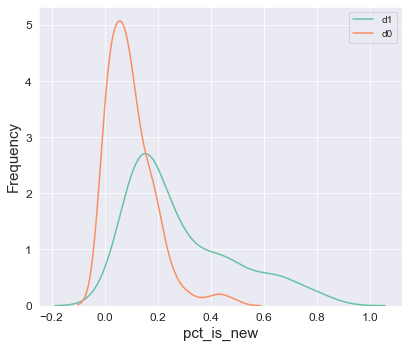

In [10]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x='pct_is_new',label="d1")
sns.kdeplot(data = d0,x='pct_is_new',label="d0")
plt.xlabel('pct_is_new', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()

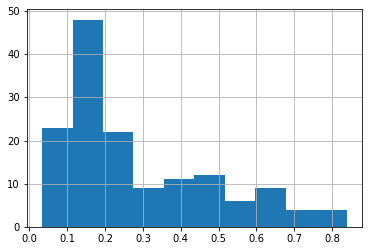

<AxesSubplot:>

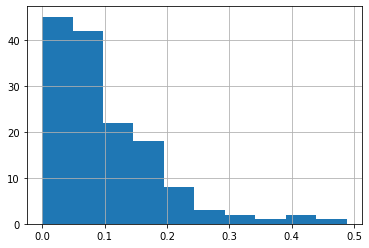

In [5]:
d1['pct_is_new'].hist()
plt.show()
d0['pct_is_new'].hist()

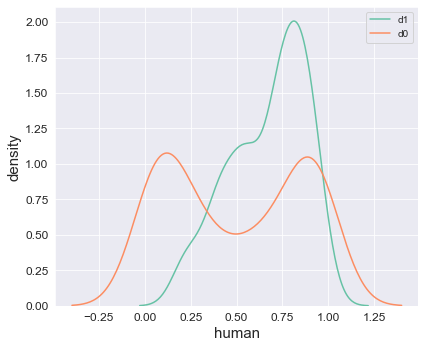

In [13]:
st = "human"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("human.png")

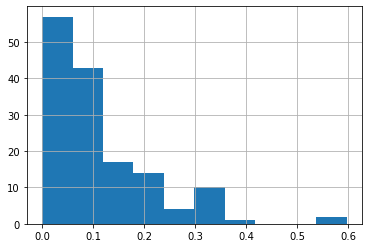

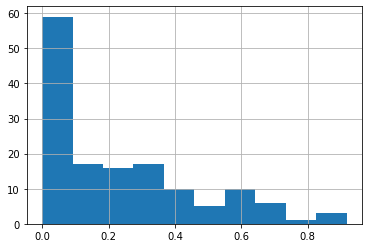

In [10]:
d1['animal'].hist()
plt.show()
d0['animal'].hist()
plt.show()

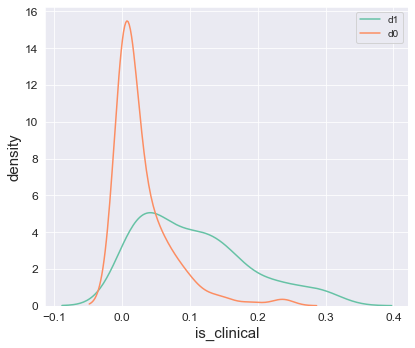

In [14]:
st = "is_clinical"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("isclin.png")

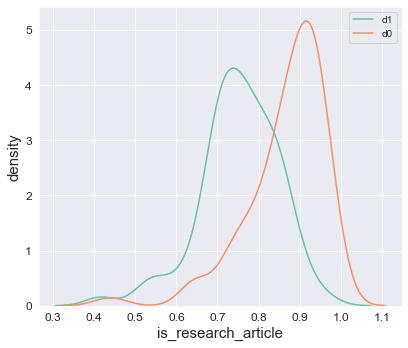

In [17]:
st = "is_research_article"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("is_research.png")

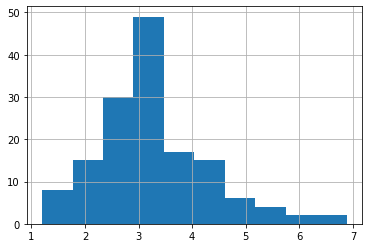

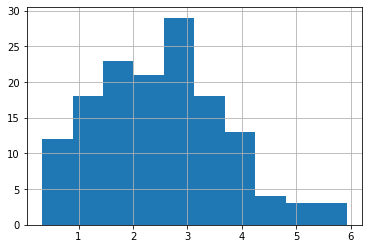

In [13]:
d1['rcr_hi'].hist()
plt.show()
d0['rcr_hi'].hist()
plt.show()

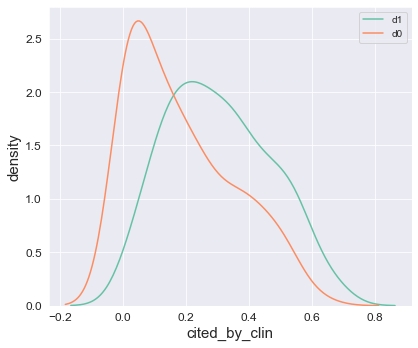

In [18]:
st = "cited_by_clin"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("cited_clin.png")

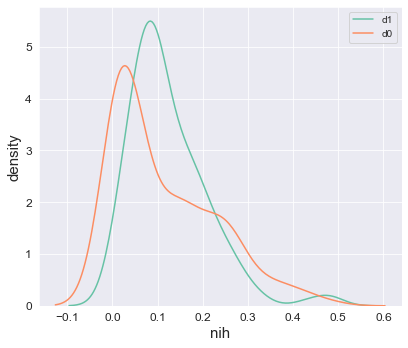

In [19]:
st = "nih"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("nih.png")

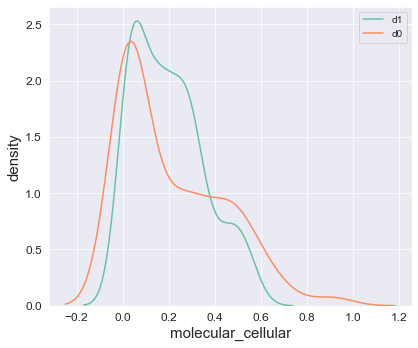

In [32]:
st = "molecular_cellular"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("molcel.png")

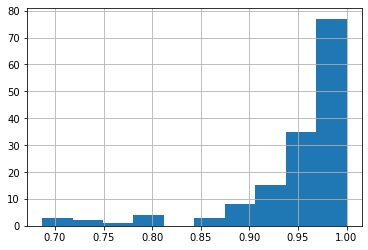

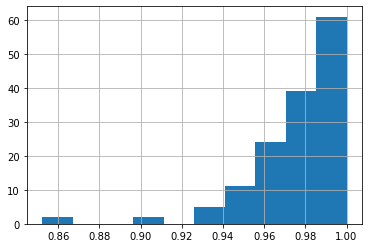

In [17]:
d1['pct_top_5_anc'].hist()
plt.show()
d0['pct_top_5_anc'].hist()
plt.show()

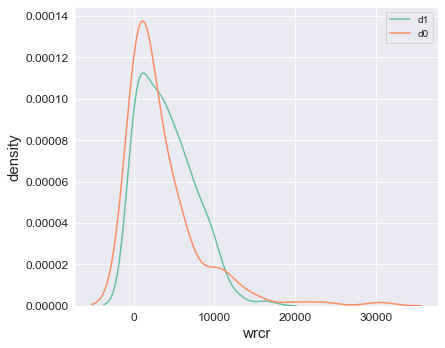

In [21]:
st = "wrcr"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("wrcr.png")

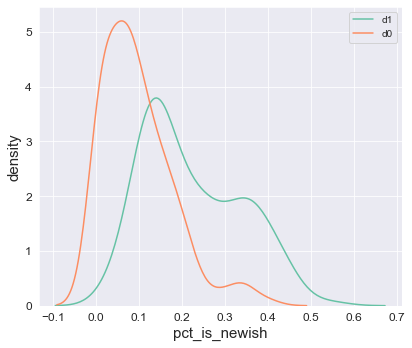

In [22]:
st = "pct_is_newish"
sns.set_style('darkgrid')
sns.set_palette('Set2')
fig = plt.figure(figsize=(6.5,5.5))
sns.kdeplot(data = d1,x=st,label="d1")
sns.kdeplot(data = d0,x=st,label="d0")
plt.xlabel(st, fontsize = 15)
plt.ylabel('density', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()
plt.show()
fig.savefig("pct_is_newish.png")

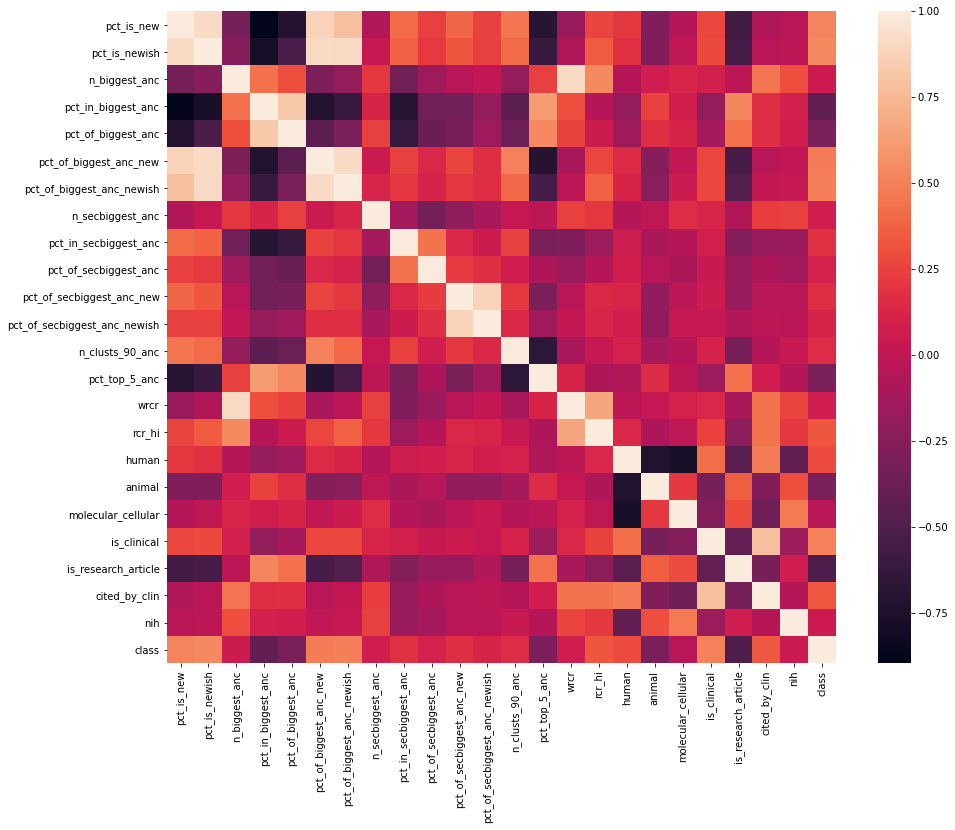

In [5]:
x = data.copy()
x = x.drop(['rcr_mid','rcr_low','pct_dusted_rmcl','pct_dusted_ccn','n','cluster','rage','year','biggest_anc','secbiggest_anc'], axis = 1)
fig = plt.figure(figsize=(15, 12))
sns.heatmap(x.corr())
plt.show()
fig.savefig('cor.png')

[0 1]


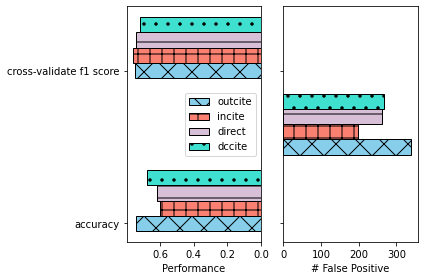

In [4]:
sns.color_palette("gray")
labels = ['accuracy', 'cross-validate f1 score']
outcite = [0.74 , 0.75]
incite = [0.6, 0.76]
direct = [0.62, 0.74]
dccite = [0.68, 0.72]

l = ['FP']
outcite1 = [339]
incite1 = [198]
direct1 = [262]
dccite1 = [268]

#OUR = [0.80, 0.81, 0.79]

x = np.arange(len(labels))  # the label locations
print(x)

xx = np.arange(1)

width = 0.10  # the width of the bars

fig, ax = plt.subplots(ncols=2, sharey=True)


rects1 = ax[0].barh(x + 0.00, outcite, width, label='outcite',edgecolor='black',hatch='x', color = "skyblue",align='center')
rects2 = ax[0].barh(x + 0.10, incite, width, label='incite',edgecolor='black',hatch='+', color = "salmon",align='center')
rects3 = ax[0].barh(x + 0.20, direct, width, label='direct',edgecolor='black',hatch='-', color = "thistle",align='center')
rects4 = ax[0].barh(x + 0.30, dccite, width, label='dccite',edgecolor='black',hatch='.', color = "turquoise",align='center')

rects1 = ax[1].barh(xx + 0.00+0.5, outcite1, width, label='outcite',edgecolor='black',hatch='x', color = "skyblue",align='center')
rects2 = ax[1].barh(xx + 0.10+0.5, incite1, width, label='incite',edgecolor='black',hatch='+', color = "salmon",align='center')
rects3 = ax[1].barh(xx + 0.20+0.5, direct1, width, label='direct',edgecolor='black',hatch='-', color = "thistle",align='center')
rects4 = ax[1].barh(xx + 0.30+0.5, dccite1, width, label='dccite',edgecolor='black',hatch='.', color = "turquoise",align='center')
#rects5 = ax.bar(x + 0.40, OUR, width, label='OUR',edgecolor='black',hatch='*')

#ax.set_yli,m([0.00,1.00]),m([0.00,1.00]),m([0.00,1.00]),m([0.00,1.00])

ax[0].invert_xaxis()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_xlabel('Performance')
#ax.set_title('Accuracy, precision and recall of different models on US based data')
ax[0].set_yticks(x)
ax[0].set_yticklabels(labels)
ax[0].legend()

#ax[1].set_yticks(xx)
#ax[1].set_yticklabels(l)
ax[1].set_xlabel('# False Positive')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
fig.savefig('performance.png')

pmid                          int64
year                        float64
exemplar_year                 int64
exemplar_cl                   int64
approval_year               float64
drug_name                    object
prize_year                  float64
year_from_prize_earliest      int64
prize_cluster_earliest        int64
year_from_prize_latest        int64
prize_cluster_latest          int64
exemplar_pred               float64
earlier_pred                float64
later_pred                  float64
dtype: object


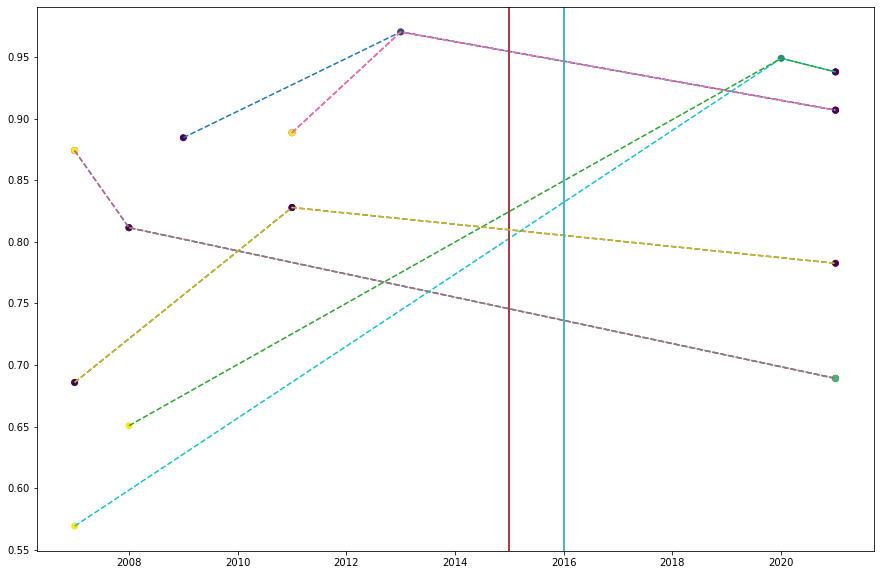

In [3]:
d = pd.read_csv("offset_prediction.csv")
plt.figure(figsize=(15, 10))
print(d.dtypes)
#d = d.drop(['pmid','year','exemplar_cl',], axis =1 )
colour=['blue','green','red','orange','cyan','black','pink','magenta','skyblue','brown']
#colors = np.random.rand(N, N)
#d = d[d['approval_year'] == 2014]
d = d.head(100)
d = d.head(10)
i = 0
palette = itertools.cycle(sns.color_palette())
for ind in d.index:
    x = [d['year_from_prize_earliest'][ind], d['exemplar_year'][ind],d['year_from_prize_latest'][ind]]
    y = [d['earlier_pred'][ind],d['exemplar_pred'][ind],d['later_pred'][ind]]
    plt.scatter(x, y, c = next(palette))
    plt.plot(x, y, c= next(palette),linestyle='dashed')
    plt.axvline(x = d['approval_year'][ind], color = next(palette), label = 'axvline - full height')
    
    #print(d['approval_year'][ind])
    i += 1

pmid                          int64
year                        float64
exemplar_year                 int64
exemplar_cl                   int64
approval_year               float64
drug_name                    object
prize_year                  float64
year_from_prize_earliest      int64
prize_cluster_earliest        int64
year_from_prize_latest        int64
prize_cluster_latest          int64
exemplar_pred               float64
earlier_pred                float64
later_pred                  float64
dtype: object


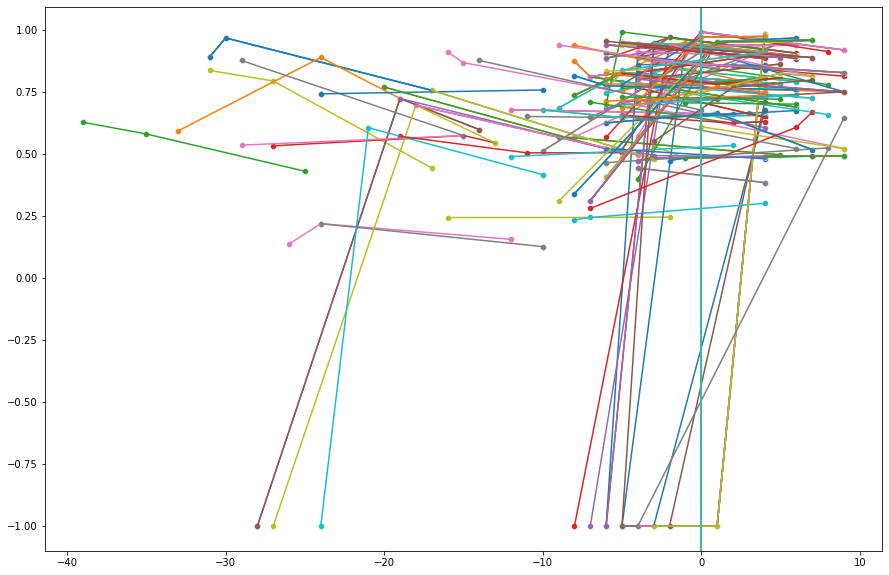

In [30]:
d = pd.read_csv("offset_prediction.csv")
plt.figure(figsize=(15, 10))
print(d.dtypes)
#d = d.drop(['pmid','year','exemplar_cl',], axis =1 )
colour=['blue','green','red','orange','cyan','black','pink','magenta','skyblue','brown']
#colors = np.random.rand(N, N)
#d = d[d['approval_year'] == 2014]
#d = d.head(100)
d = d.head(200)
palette = itertools.cycle(sns.color_palette())
i = 0
d['year_from_prize_earliest'] = d['year_from_prize_earliest'] - d['approval_year']
d['year_from_prize_latest'] = d['year_from_prize_latest'] - d['approval_year']
d['exemplar_year'] = d['exemplar_year'] - d['approval_year']
d['approval_year'] = 0
#print(d)
for ind in d.index:
    x = [d['year_from_prize_earliest'][ind], d['exemplar_year'][ind],d['year_from_prize_latest'][ind]]
    y = [d['earlier_pred'][ind],d['exemplar_pred'][ind],d['later_pred'][ind]]
    #plt.scatter(x, y, c = colour[i])
    #plt.plot(x, y, c= colour[i])
    c = next(palette)
    sns.scatterplot(x=x, y=y, sizes=(50,500), legend=False, color=c)
    sns.lineplot(x=x, y=y,estimator='max', color=c)
    plt.axvline(x = d['approval_year'][ind], color = c)
    
    #print(d['approval_year'][ind])
    #i += 1

pmid                          int64
year                        float64
exemplar_year                 int64
exemplar_cl                   int64
approval_year               float64
drug_name                    object
prize_year                  float64
year_from_prize_earliest      int64
prize_cluster_earliest        int64
year_from_prize_latest        int64
prize_cluster_latest          int64
exemplar_pred               float64
earlier_pred                float64
later_pred                  float64
dtype: object
214


/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/anaconda3/envs/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/arabi/ana

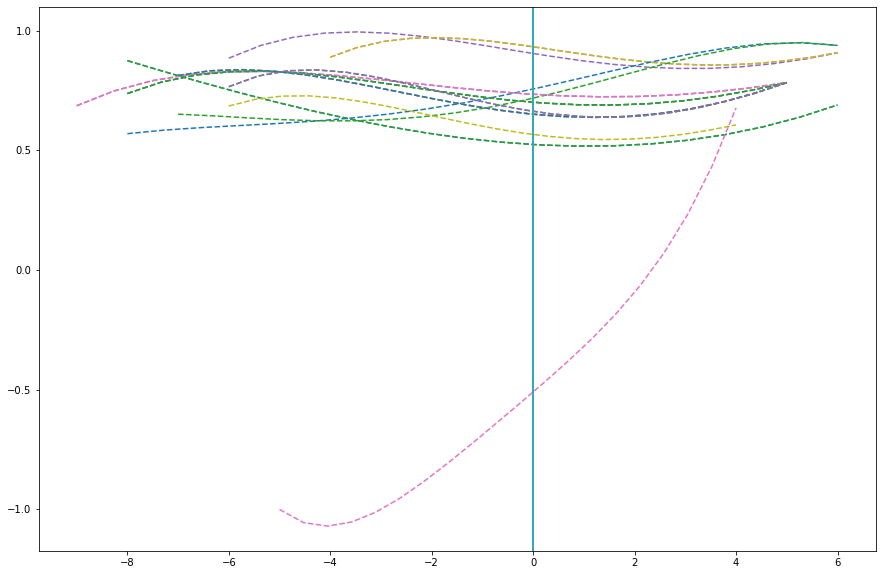

In [10]:
d = pd.read_csv("offset_prediction.csv")
plt.figure(figsize=(15, 10))
print(d.dtypes)
#d = d.drop(['pmid','year','exemplar_cl',], axis =1 )
colour=['blue','green','red','orange','cyan','black','pink','magenta','skyblue','brown']
#colors = np.random.rand(N, N)
#d = d[d['approval_year'] == 2014]
#d = d.head(100)

d = d[d['year_from_prize_earliest'] != d['exemplar_year']]
d = d[d['year_from_prize_latest'] != d['exemplar_year']]
print(len(d))
#d = d.sample(n=20,replace=False)
d = d.head(20)
i = 0
d['year_from_prize_earliest'] = d['year_from_prize_earliest'] - d['approval_year']
d['year_from_prize_latest'] = d['year_from_prize_latest'] - d['approval_year']
d['exemplar_year'] = d['exemplar_year'] - d['approval_year']
d['approval_year'] = 0
#print(d)

'''def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y'''
palette = itertools.cycle(sns.color_palette())
a = min(d['year_from_prize_earliest'].min(),d['year_from_prize_latest'].min(), d['exemplar_year'].min())
b = max(d['year_from_prize_earliest'].max(),d['year_from_prize_latest'].max(), d['exemplar_year'].max())
for ind in d.index:
    x = [d['year_from_prize_earliest'][ind], d['exemplar_year'][ind],d['year_from_prize_latest'][ind]]
    y = [d['earlier_pred'][ind],d['exemplar_pred'][ind],d['later_pred'][ind]]
    #plt.scatter(x, y, c = colour[i])
    #plt.plot(x, y, c= colour[i])
    
    #sns.scatterplot(x=x, y=y, sizes=(50,500), legend=False, color=colour[i])
    #sns.lineplot(x=x, y=y,estimator='max', color=colour[i])
    
    
    a = min(x)
    b = max(x)
    
    model1 = np.poly1d(np.polyfit(x, y, 4))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color = colour[i])
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    
    '''x = np.asarray(x)
    y = np.asarray(y)
    
    parameters, covariance = curve_fit(Gauss, x, y)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_y = Gauss(x, fit_A, fit_B)
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, fit_y, '-', label='fit')
    plt.legend()'''
    
    
    plt.axvline(x = d['approval_year'][ind], color = next(palette))
    
    #print(d['approval_year'][ind])
    #i += 1

50


/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a cop

/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_11945/4281274673.py:34: SettingWithCopyWarning: 
A value is trying to be set on a cop

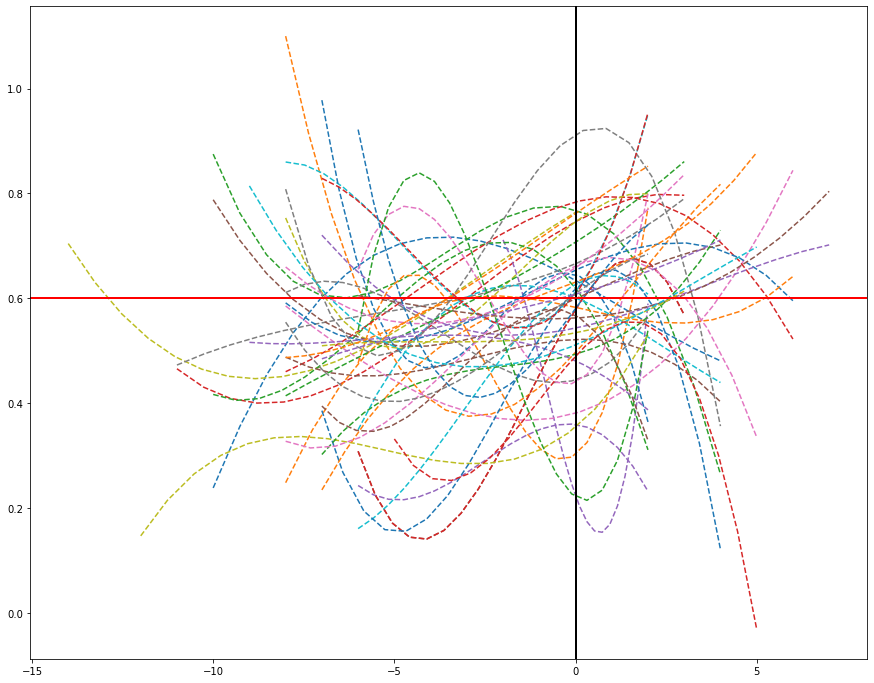

In [2]:
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_prediction.csv")
d = d.head(200)
#print(len(d))
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))

#print(d.dtypes)
palette = itertools.cycle(sns.color_palette())


alpha = 0.6
s = "*"
for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    
    y = d['pp'][ind]
    y = convert(y)
    
    
    x = [a - d['approval_year'][ind] for a in x]
        #x[i] = x[i] - d['approval_year'][ind]

    d['approval_year'][ind] = 0

    '''xx,yy = [],[]
    for i in range(0,len(x)):
        if x[i] >= -7.5 and x[i] <= 3.5:
            xx.append(x[i])
            yy.append(y[i])
            i+= 1
    x = xx
    y = yy
    if len(x) == 0:
        continue'''

    
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue
        
    #plt.scatter(x, y, c = next(palette))
    #plt.plot(x, y, c= next(palette),linestyle='dashed')
        
    
    model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    
    
    '''x = np.asarray(x)
    y = np.asarray(y)
    
    parameters, covariance = curve_fit(Gauss, x, y)
    fit_A = parameters[0]
    fit_B = parameters[1]
    fit_y = Gauss(x, fit_A, fit_B)
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, fit_y, '-', label='fit')
    plt.legend()'''
    
    
    plt.axvline(x = d['approval_year'][ind], color = "black")
    plt.axhline(y = 0.60, color = "red")
    
    #print(d['approval_year'][ind])
    #i += 1

15


/tmp/ipykernel_7420/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_7420/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_7420/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['approval_year'][ind] = 0
/tmp/ipykernel_7420/2901768047.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of

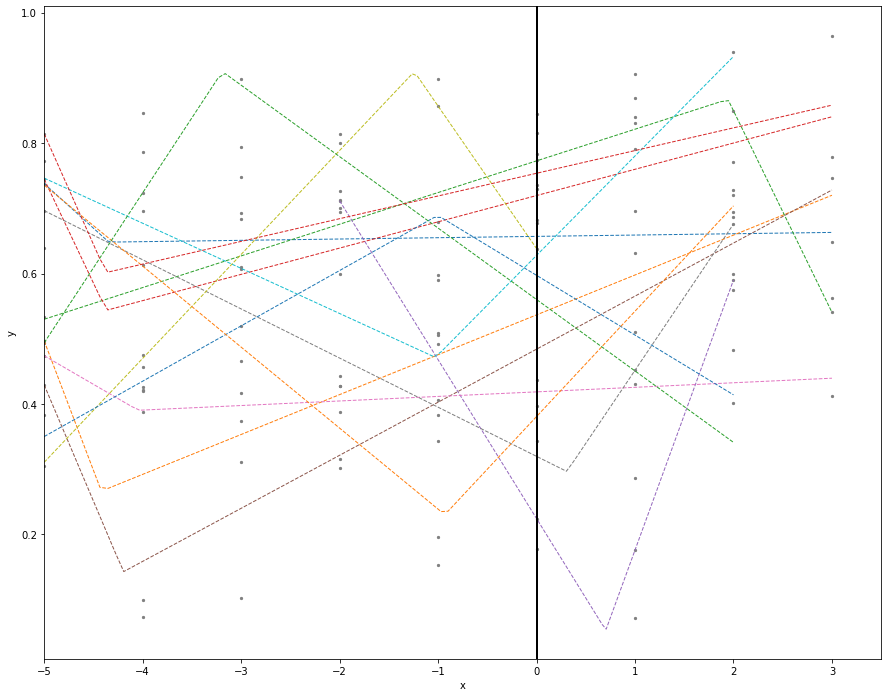

In [67]:
#piecewise linear regression plot in python
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_prediction.csv")
d = d.head(50)
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))
palette = itertools.cycle(sns.color_palette())

for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    y = d['pp'][ind]
    y = convert(y)
    x = [a - d['approval_year'][ind] for a in x]
    d['approval_year'][ind] = 0

    xx,yy = [],[]
    for i in range(0,len(x)):
        if x[i] >= -5 and x[i] <= 3.5:
            xx.append(x[i])
            yy.append(y[i])
            i+= 1
    x = xx
    y = yy
    if len(x) == 0:
        continue
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue

    breakpoint_1 = 0
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints= 1)
    #pw_fit.summary()
    #pw_fit.plot()
    
    pw_fit.plot_data(color="grey", s=5)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color=next(palette), linewidth=1,linestyle = "--")
    #pw_fit.plot_breakpoints()
    #pw_fit.plot_breakpoint_confidence_intervals()
    plt.xlim([-5,3.5])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.show()
    #plt.close()
    

    
    '''model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    

    plt.axvline(x = d['approval_year'][ind], color = "black")
    plt.axhline(y = 0.60, color = "red")'''
    


91
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
Algorithm didn't converge. No fit to plot.
yes before  67


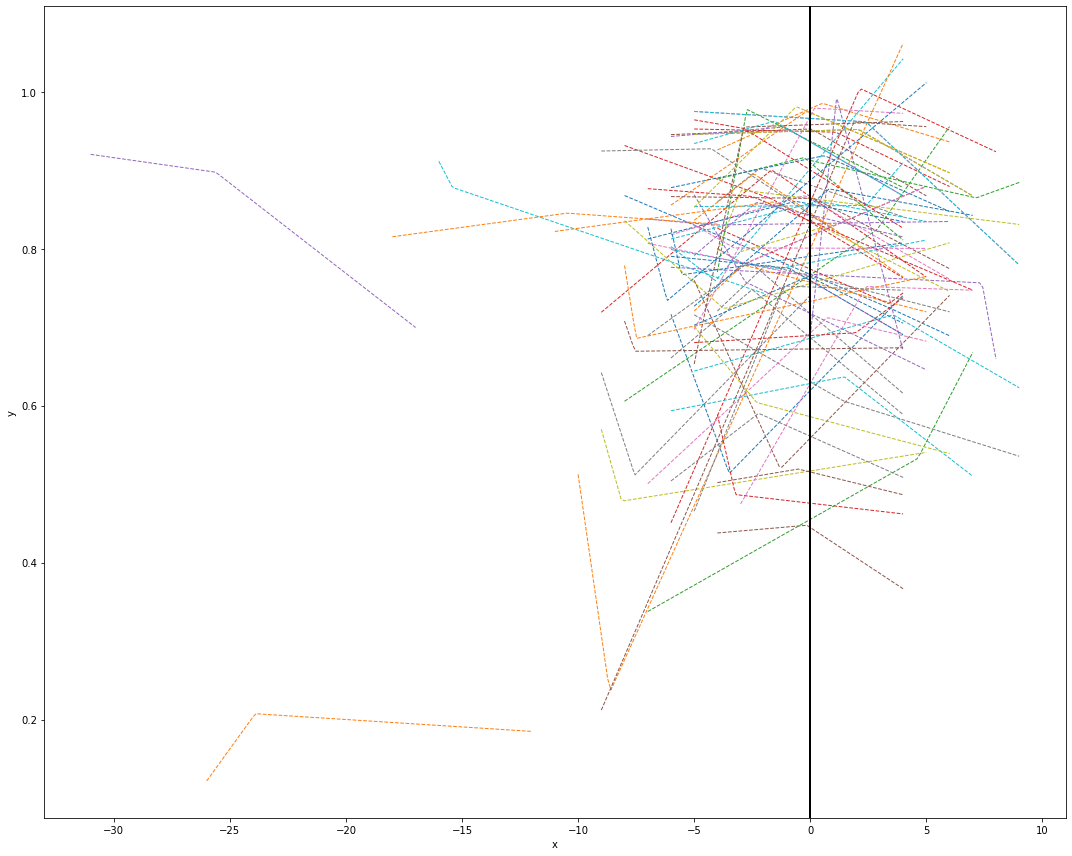

In [2]:
#piecewise linear regression plot in python
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_temporary.csv")
d = d.head(350)
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))
palette = itertools.cycle(sns.color_palette())

lin_yr = []
lin_pr = []
yes_before = 0
for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    y = d['pp'][ind]
    y = convert(y)
    #tot = np.sum(y)
    #y = [a/tot for a in y]
    x = [a - d['approval_year'][ind] for a in x]
    if len(x) < 3: 
        continue
    lin_yr = lin_yr + x
    lin_pr = lin_pr + y
    
    for i in range(0,len(x)):
        if y[i] >= 0.75 and x[i] < 0:
            yes_before += 1
            break
    
    '''d['approval_year'][ind] = 0
    bef = 0
    for i in range(0,len(x)):
        if y[i] == max(y) and x[i] <= 0:
            bef = 1
            break
        if x[i] > 0:
            break
        i += 1
    if bef == 0:
        continue'''
      
    
    
    '''a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue'''

        
    breakpoint_1 = 0
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints= 1)
    #pw_fit.summary()
    #pw_fit.plot()
    
    pw_fit.plot_data(color="white", s=5, alpha = 0.1)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color=next(palette), linewidth=1,linestyle = "--")
    #pw_fit.plot_breakpoints()
    #pw_fit.plot_breakpoint_confidence_intervals()
    #plt.xlim([-8,4])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axvline(x = 0, color = "black")
    #plt.show()
    #plt.close()
    

    
    '''model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    plt.plot(polyline, model1(polyline), "--",color=next(palette))
    

    plt.axvline(x = d['approval_year'][ind], color = "black")'''
    #plt.ylim([0.15,0.90])
    #plt.xlim([-13,5])
    #plt.axhline(y = 0.60, color = "red")
    
plt.tight_layout()
print("yes before ",yes_before)

In [3]:
x,y = lin_yr, lin_pr
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
'''x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")'''

'''sns.regplot(x,y,ci=90)
plt.show()
fr = pd.DataFrame()
fr['year'] = lin_yr
fr['pred'] = lin_pr
#fr.to_csv("reg.csv", index = False)
fr = fr[fr.year > -15]
sns.lmplot(x="year", y="pred", data=fr, ci = 90)'''



model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.03895483297471214
intercept: 0.7742958903100318
slope: [0.         0.00567847]


In [4]:
x,y = lin_yr, lin_pr
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     43.98
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           5.22e-11
Time:                        23:24:00   Log-Likelihood:                 482.77
No. Observations:                1087   AIC:                            -961.5
Df Residuals:                    1085   BIC:                            -951.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7743      0.005    161.119      0.0

<Figure size 288x288 with 0 Axes>

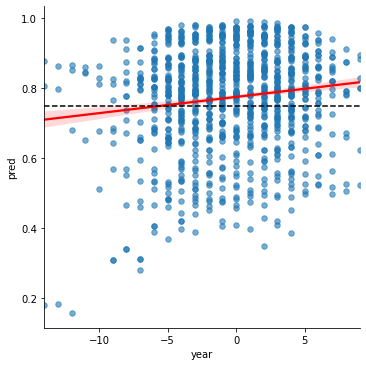

<Figure size 432x288 with 0 Axes>

In [5]:
x,y = lin_yr, lin_pr
x, y = np.array(x), np.array(y)


'''sns.regplot(x,y,ci=80,scatter_kws={"s": 20,"alpha": 0.3},line_kws={"color": "red"})
plt.axhline(y = 0.75,color = "black",linestyle = "--" )
plt.show()'''

fig = plt.figure(figsize=(4, 4))
fr = pd.DataFrame()
fr['year'] = lin_yr
fr['pred'] = lin_pr
#fr.to_csv("reg.csv", index = False)
fr = fr[fr.year > -15]
sns.lmplot(x="year", y="pred", data=fr, ci = 80,scatter_kws={"s": 30,"alpha": 0.6},line_kws={"color": "red"})
plt.axhline(y = 0.75,color = "black",linestyle = "--" )
plt.show()
plt.savefig("reg_exm.png",dpi = 1000)

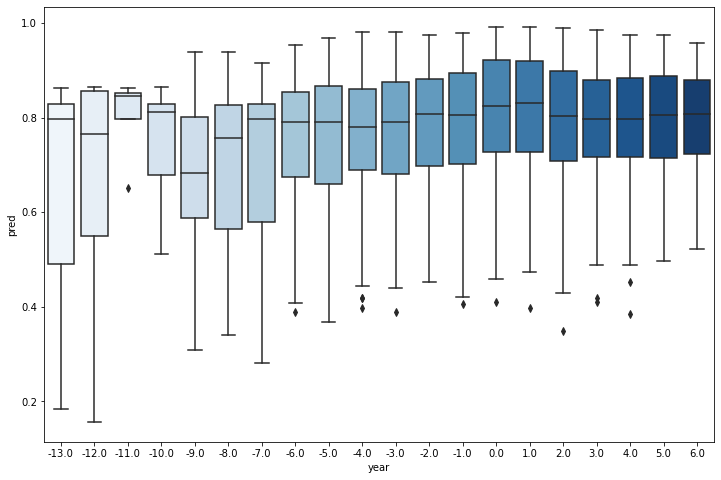

<Figure size 288x288 with 0 Axes>

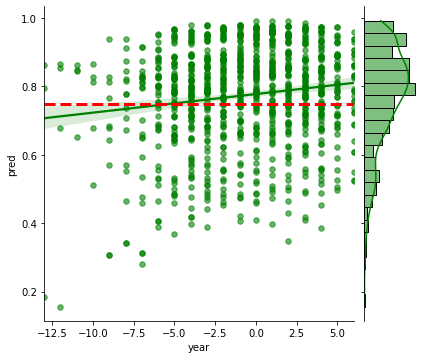

In [10]:
#box and whiskers for each year
sns.set_palette('Set2')
xx = pd.DataFrame()
xx['year'] = x
xx['pred'] = y
xx = xx[xx['year'] >= -13]
xx = xx[xx['year'] <= 6]
fig = plt.figure(figsize=(12, 8))
sns.boxplot( x=xx['year'], y=xx['pred'], palette="Blues");
plt.show()
fig.savefig("box_exem.png")


fig = plt.figure(figsize=(4, 4))
g = sns.jointplot(data=xx, x="year", y="pred",kind = 'reg',color = "green",joint_kws = {'scatter_kws':dict(alpha=0.6,s=30)})
g.ax_marg_x.remove()
plt.axhline(y = 0.75,color = "red",linestyle = "--",linewidth = 3)
plt.show()
fig.savefig("reg_exem.png", dpi = 1000)


In [12]:
#x,y = lin_yr, lin_pr
tot,tot_before = 0,0
tot_point_past = 0
for i in range(0,len(lin_yr)):
    if lin_pr[i] >= 0.75:
        tot += 1
    if lin_yr[i] <= 0:
        tot_point_past += 1
        
    
for i in range(0,len(lin_yr)):
    if lin_pr[i] >= 0.75 and lin_yr[i] <= 0:
        tot_before += 1

print(len(lin_yr))
print(tot)
print(tot_before)
print(tot_point_past)
'''
for head(300) with droped duplicates:
917 - total
219 - 0.75
147 - 0.75 before 0
'''

'''
total unique trajectories: 91
0.75 appeard <= 0: 73, 80%
0.75 appeard <= -1: 64, 70%
0.75 appeard <= -2: 62, 68%
0.75 appeard <= -3: 54, 60%
0.75 appeard <= -4: 47, 52%
0.75 appeard <= -5: 45, 50%
'''

1087
692
398
636


'\ntotal unique trajectories: 91\n0.75 appeard <= 0: 73, 80%\n0.75 appeard <= -1: 64, 70%\n0.75 appeard <= -2: 62, 68%\n0.75 appeard <= -3: 54, 60%\n0.75 appeard <= -4: 47, 52%\n0.75 appeard <= -5: 45, 50%\n'

76


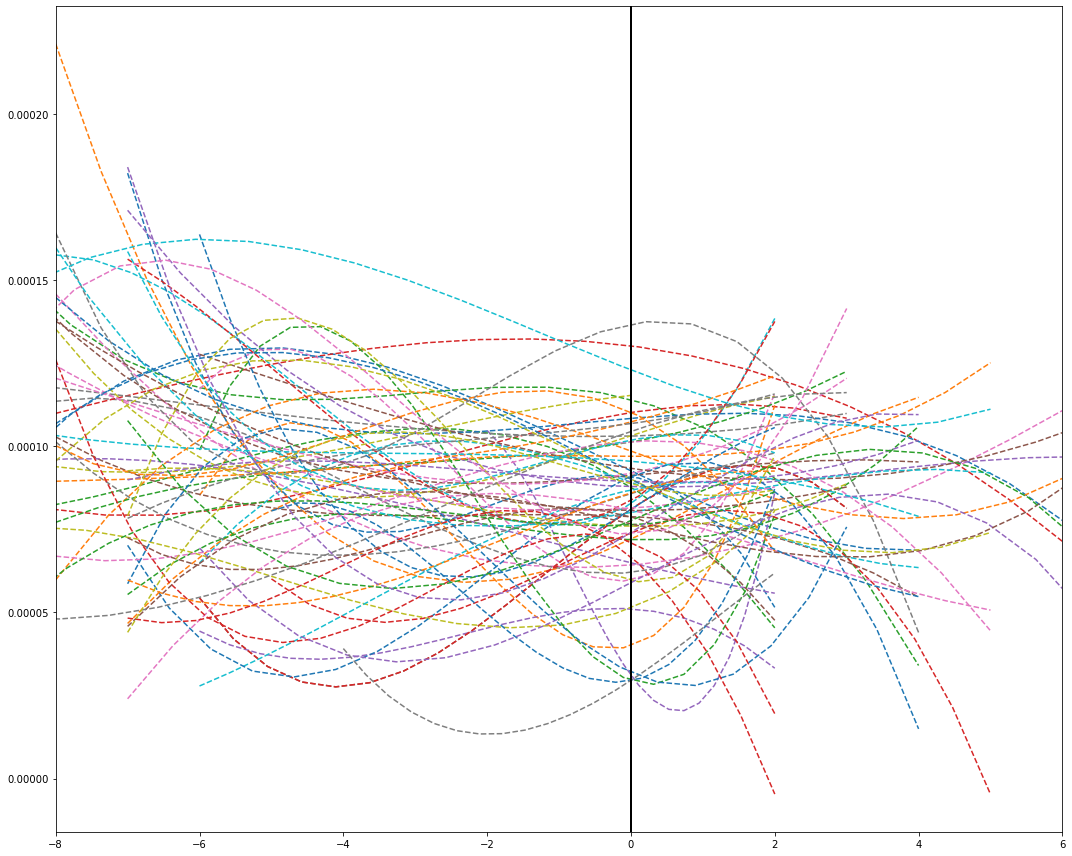

In [4]:
#piecewise linear regression plot in python
def convert(lst):
    lst = lst[1:]
    lst = lst[:-1]
    lst = lst.split(', ')
    
    lst = [float(a) for a in lst]
    #print(lst)
    return lst
    
fig = plt.figure(figsize=(15, 12))
d = pd.read_csv("full_trajectory_normalized.csv")
d = d.head(300)
d = d.drop_duplicates(subset = ["drug_name"])
print(len(d))
palette = itertools.cycle(sns.color_palette())

for ind in d.index:
    x = d['yy'][ind]
    x = convert(x)
    y = d['pp'][ind]
    y = convert(y)
    x = [a - d['approval_year'][ind] for a in x]
    #d['approval_year'][ind] = 0
    
    #tot = np.sum(y)
    #y = [a/tot for a in y]
    bef = 0
    for i in range(0,len(x)):
        if y[i] == max(y) and x[i] <= 0:
            bef = 1
            break
        if x[i] > 0:
            break
        i += 1
    #if bef == 0:
        #continue
        
    
    
    a = min(x)
    b = max(x)
    if a < 0 and b < 0:
        continue

        
    
        
    '''breakpoint_1 = 0
    pw_fit = piecewise_regression.Fit(x, y, n_breakpoints= 1)
    #pw_fit.summary()
    #pw_fit.plot()
    
    pw_fit.plot_data(color="grey", s=5)
    # Pass in standard matplotlib keywords to control any of the plots
    pw_fit.plot_fit(color=next(palette), linewidth=1,linestyle = "--")
    #pw_fit.plot_breakpoints()
    #pw_fit.plot_breakpoint_confidence_intervals()
    #plt.xlim([-5,3.5])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axvline(x = d['approval_year'][ind], color = "black")
    #plt.show()
    #plt.close()'''
    

    
    model1 = np.poly1d(np.polyfit(x, y, 3))
    #polyline = np.linspace(-15, 10, 20)
    polyline = np.linspace(a, b, 20)
    #plt.scatter(x, y, color=next(palette))
    c = next(palette)
    plt.plot(polyline, model1(polyline),"--",color=c)
    #plt.fill_between(polyline, model1(polyline)-np.std(model1(polyline), axis=0), model1(polyline)+np.std(model1(polyline), axis=0) ,
                      #alpha=0.3, facecolor=c)
    '''if bef == 1:
        plt.plot(polyline, model1(polyline),"--",color=c)
    else:
        plt.plot(polyline, model1(polyline),"--",color=c, linewidth = 3)'''
    
    '''c = next(palette)
    sns.scatterplot(x=x, y=y, sizes=(50,500), legend=False, color=c)
    sns.lineplot(x=x, y=y,estimator='max', color=c)
    #plt.ylim([0.0,0.20])
    #plt.xlim([-20,10])'''
    

    plt.axvline(x = 0, color = "black")
    #plt.ylim([0.25,0.90])
    plt.xlim([-8,6])
    #plt.axhline(y = 0.60, color = "red")
    
plt.tight_layout()

In [ ]:
#transparent dot in background
#a linear fit
#shading around 95% confidence interval for the aggregated dataset
#scametic diagram
#regression co-efficient
#gephi, cyposcape
#https://realpython.com/linear-regression-in-python/
#https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot
#https://seaborn.pydata.org/tutorial/regression.html

In [6]:
kk = []
kk = kk + ['a','b','c']
print(kk)

['a', 'b', 'c']


       pct_is_new  pct_is_newish  n_biggest_anc  pct_of_biggest_anc  \
class    0.514589       0.536761       0.054485           -0.309839   

       n_secbiggest_anc  pct_of_secbiggest_anc_new  pct_top_5_anc      wrcr  \
class          0.070191                   0.166156      -0.305554  0.072605   

        rcr_mid    rcr_hi     human   animal  molecular_cellular  is_clinical  \
class  0.217541  0.326698  0.283915 -0.30735           -0.038016     0.499622   

       is_research_article  cited_by_clin      nih  class  
class            -0.510312       0.340274  0.05068    1.0  
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal  

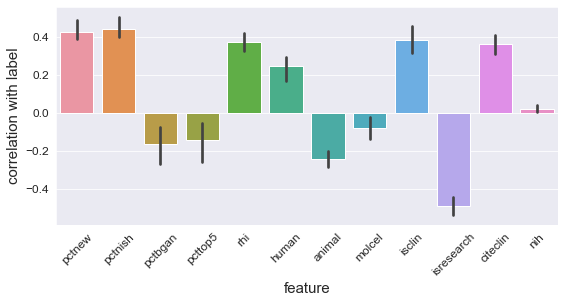

In [50]:
x_train = pd.read_csv("data_84.csv")
x_train = x_train.drop(['cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','pct_of_secbiggest_anc',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','rage','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
a = x_train.corr()
print(a.tail(1))
print(a.dtypes)

x = ['pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih',
    'pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih',
    'pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih',
    'pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih']
y = [0.514589 , 0.536761,-0.309839,-0.305554,0.326698,0.283915,-0.30735 ,-0.038016,0.499622,
    -0.510312,0.340274,0.05068,
    0.405524 , 0.399872, -0.149992 ,-0.117729,0.421573,0.303893,-0.257706,-0.127085,0.386135,
    -0.556144, 0.419113,0.016337,
    0.380536, 0.395348, -0.04838 ,-0.030968,0.411892,0.255092,-0.207137,-0.141222,
    0.333358,-0.436657,0.396025,0.010481,
    0.404863,0.434149, -0.150814 ,-0.107007,0.327748,0.131885,-0.1867,0.000108,0.299344,
    -0.449224,0.28191,0.004167]
d = pd.DataFrame()
d['label'] = x
d['val'] = y
fig = plt.figure(figsize=(9, 4))
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data = d, x='label', y='val')
plt.xlabel("feature", fontsize = 15)
plt.ylabel('correlation with label', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.show()
fig.savefig("correlation_of_feature.png",bbox_inches ="tight",dpi = 4000)

length of training file  292
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
dtype: object
top 10
n_secbiggest_anc             0.000000
n_biggest_anc                0.002798
pct_of_secbiggest_anc_new    0.037419
wrcr                         0.048941
rcr_mid                      0.071668
molecular_cellular           0.076117
rcr_hi                       0.077502
cited_by_clin                0.086545
animal           

<Figure size 468x360 with 0 Axes>

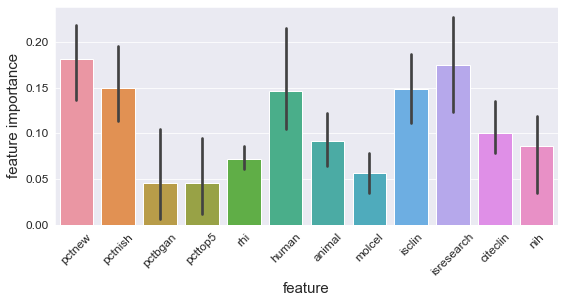

In [16]:
def train(x_train):
    
    print("length of training file ",len(x_train))
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','pct_of_secbiggest_anc',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','rage','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    print(x_train.dtypes)
    
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    fig = plt.figure(figsize=(6.5,5))
    importance = mutual_info_classif(x_train,y_train)
    feat_imp = pd.Series(importance,x_train.columns[0:len(x_train.columns)])
    
    feat_imp = feat_imp.sort_values(ascending=True)
    #feat_imp = feat_imp.tail(10)
    print("top 10")
    print(feat_imp)
    #feat_imp.plot(kind = 'bar',color = 'teal')
    #plt.xlabel("feature importance outcites",fontsize = 15)
    #plt.yticks(fontsize = 15)
    #plt.show()
    #fig.savefig("best_f1_outcite.png",bbox_inches ="tight",dpi = 400)
    
    x = ['pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih',
        'pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih',
        'pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih',
        'pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih']
    y = [feat_imp['pct_is_new'] , feat_imp['pct_is_newish'],feat_imp['pct_of_biggest_anc'],feat_imp['pct_top_5_anc'],
         feat_imp['rcr_hi'],feat_imp['human'],feat_imp['animal'] ,feat_imp['molecular_cellular'],feat_imp['is_clinical'],
         feat_imp['is_research_article'],feat_imp['cited_by_clin'],feat_imp['nih'],
        0.17666107291096478, 0.14270642543553924, 0.0, 0.03820841093749272, 0.06356479124350622, 0.1006702119386258, 0.07058534850629927,
         0.032694363641692314, 0.1983639534192998, 0.2413992997807961, 0.07542126472274902, 0.12424360424790803,
        0.11145620358958364, 0.10326222653566353, 0.022574355446704386, 0.021153578913820192, 0.08857400224775458, 0.12428490200030007,
         0.13977555127768793, 0.08055345283163096, 0.12085583793479704, 0.1385327849469007, 0.1508417258729302, 0.10686839614209154,
        0.20918009463808906, 0.13522787417348736, 0.02625164069410113, 0.003038545096068157, 0.05815564766093395, 0.10825479222091183,
         0.05743565500621739, 0.03746152564875538, 0.10183441377296898, 0.10844377754671686, 0.08855931253355509, 0.011061822329936355]
    d = pd.DataFrame()
    d['label'] = x
    d['val'] = y
    fig = plt.figure(figsize=(9, 4))
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    sns.barplot(data = d, x='label', y='val')
    plt.xlabel("feature", fontsize = 15)
    plt.ylabel('feature importance', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 45)
    plt.yticks(fontsize = 12)
    plt.show()
    fig.savefig("feature importance.png",bbox_inches ="tight",dpi = 1000)
    
    
    

x_train = pd.read_csv("data_84.csv")
train(x_train)

292
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
pct_dusted_ccn                    int64
pct_dusted_rmcl                 float64
biggest_anc                       int64
n_biggest_anc                     int64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                  int64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                   int64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr_hi                          floa

<Figure size 360x288 with 0 Axes>

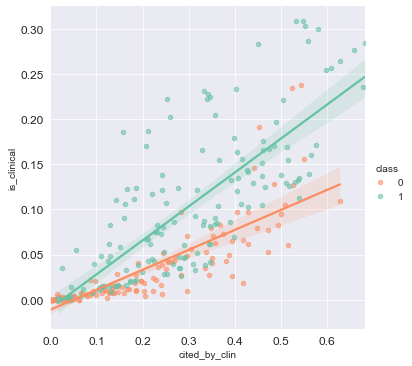

<Figure size 432x288 with 0 Axes>

In [47]:
data = pd.read_csv("data_84.csv")
print(len(data))
print(data.dtypes)
d1 = data[data["class"] == 1]
d0 = data[data["class"] == 0]
#plt.scatter(x = d1['cited_by_clin'],y=d1['is_clinical'], color = "red")
#plt.scatter(x = d0['cited_by_clin'],y=d0['is_clinical'], color = "black")

fig = plt.figure(figsize=(5, 4))
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.lmplot(x='cited_by_clin', y='is_clinical', data=data,hue = 'class', ci = 95,scatter_kws={"s": 20,"alpha": 0.6},palette=["#fc8d62","#66c2a5"])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()
plt.savefig("clin_citedbyclin.png",bbox_inches ="tight",dpi = 800)

292
cluster                           int64
year                              int64
n                                 int64
pct_is_new                      float64
pct_is_newish                   float64
pct_dusted_ccn                    int64
pct_dusted_rmcl                 float64
biggest_anc                       int64
n_biggest_anc                     int64
pct_in_biggest_anc              float64
pct_of_biggest_anc              float64
pct_of_biggest_anc_new          float64
pct_of_biggest_anc_newish       float64
secbiggest_anc                  float64
n_secbiggest_anc                  int64
pct_in_secbiggest_anc           float64
pct_of_secbiggest_anc           float64
pct_of_secbiggest_anc_new       float64
pct_of_secbiggest_anc_newish    float64
n_clusts_90_anc                   int64
pct_top_5_anc                   float64
wrcr                            float64
rcr_low                         float64
rcr_mid                         float64
rcr_hi                          floa

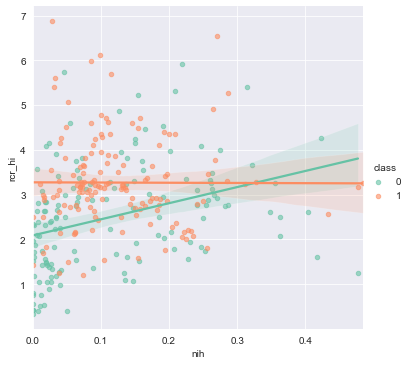

In [31]:
data = pd.read_csv("data_84.csv")
print(len(data))
print(data.dtypes)
d1 = data[data["class"] == 1]
d0 = data[data["class"] == 0]
#plt.scatter(x = d1['pct_is_new'],y=d1['pct_is_newish'], color = "red")
#plt.scatter(x = d0['pct_is_new'],y=d0['pct_is_newish'], color = "black")

sns.lmplot(x='nih', y='rcr_hi', data=data,hue = 'class', ci = 95,scatter_kws={"s": 20,"alpha": 0.6})
